In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split,  KFold, cross_val_score, cross_val_predict
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [12]:
from sklearn.preprocessing import StandardScaler

In [44]:
df = pd.read_csv('../../data/telecom_pca.csv')
x = df.drop(columns=['TARGET', 'Unnamed: 0'])
columns = x.columns
y = df['TARGET']

In [45]:
x

,YEAR_JOINED,CURRENT_YEAR,BILL_AMOUNT,PAID_AMOUNT,PAYMENT_TRANSACTIONS,PARTY_REV,PREPAID_LINES,POSTPAID_LINES,OTHER_LINES,LINE_REV,MOUS_TO_LOCAL_MOBILES,MOUS_FROM_LOCAL_MOBILES,MOUS_TO_LOCAL_LANDLINES,MOUS_FROM_LOCAL_LANDLINES,MOUS_TO_INT_NUMBER,MOUS_FROM_INT_NUMBER,DATA_IN_BNDL,DATA_OUT_BNDL
0,1994,2019,931.208938,812.175000,1,5968.700000,2,6,2,945.040000,1004.070,35.850,34.015,72.075,141.840,56.115,11944.079102,0.0
1,1994,2019,431.082618,486.500000,1,6245.141667,6,4,2,493.815000,159.050,10.595,7.715,11.750,5.110,0.000,9903.157715,0.0
2,1994,2019,50.619644,52.815000,1,1666.488333,2,3,1,50.300000,0.000,0.000,0.000,0.000,0.000,0.000,0.102539,0.0
3,1994,2019,399.710034,422.235000,1,2522.008333,3,4,3,406.586667,288.805,158.500,2.670,15.965,0.000,0.000,3600.322266,0.0
4,1994,2019,612.665844,825.888333,1,1219.961667,0,2,1,751.185000,209.760,186.050,17.515,28.685,3.235,4.475,3852.026367,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1140599,2017,2019,297.752650,313.950000,1,2418.486667,5,4,3,303.166667,0.000,0.000,0.000,0.000,0.000,0.000,307945.957031,0.0
1140600,2017,2019,160.663773,178.500000,1,454.116667,0,1,1,170.000000,0.000,0.000,0.000,0.000,0.000,0.000,22647.873535,0.0
1140601,2017,2019,570.147016,642.911667,1,615.866667,1,1,0,609.630000,154.150,64.990,3.660,10.050,0.000,0.000,17582.867188,0.0
1140602,2017,2019,452.736799,525.413333,2,735.645000,1,2,0,414.840000,218.805,102.075,54.065,7.980,5.350,0.065,3015.338867,0.0


In [46]:
scaler = StandardScaler()
scaler.fit(x)
x = scaler.transform(x)


In [47]:
x = pd.DataFrame(x, columns= columns)
x

,YEAR_JOINED,CURRENT_YEAR,BILL_AMOUNT,PAID_AMOUNT,PAYMENT_TRANSACTIONS,PARTY_REV,PREPAID_LINES,POSTPAID_LINES,OTHER_LINES,LINE_REV,MOUS_TO_LOCAL_MOBILES,MOUS_FROM_LOCAL_MOBILES,MOUS_TO_LOCAL_LANDLINES,MOUS_FROM_LOCAL_LANDLINES,MOUS_TO_INT_NUMBER,MOUS_FROM_INT_NUMBER,DATA_IN_BNDL,DATA_OUT_BNDL
0,-3.186368,0.236061,1.487755,1.127430,-0.474652,0.220896,-0.025157,0.045748,0.139987,1.553455,0.677560,-0.312993,0.436653,0.299032,0.792977,1.383933,0.043267,-0.020457
1,-3.186368,0.236061,0.134979,0.253277,-0.474652,0.235944,0.670276,0.000243,0.139987,0.306848,-0.259684,-0.397473,-0.245145,-0.203604,-0.401701,-0.192129,-0.017525,-0.020457
2,-3.186368,0.236061,-0.894123,-0.910789,-0.474652,-0.013300,-0.025157,-0.022509,0.012830,-0.918458,-0.436092,-0.432914,-0.445148,-0.301507,-0.446350,-0.192129,-0.312503,-0.020457
3,-3.186368,0.236061,0.050120,0.080781,-0.474652,0.033271,0.148701,0.000243,0.267143,0.065861,-0.115768,0.097283,-0.375931,-0.168484,-0.446350,-0.192129,-0.205265,-0.020457
4,-3.186368,0.236061,0.626138,1.164238,-0.474652,-0.037607,-0.372874,-0.045262,0.012830,1.017888,-0.203440,0.189441,0.008909,-0.062499,-0.418084,-0.066443,-0.197768,-0.020457
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1140599,0.595050,0.236061,-0.225661,-0.209869,-0.474652,0.027636,0.496418,0.000243,0.267143,-0.219859,-0.436092,-0.432914,-0.445148,-0.301507,-0.446350,-0.192129,8.860141,-0.020457
1140600,0.595050,0.236061,-0.596468,-0.573434,-0.474652,-0.079297,-0.372874,-0.068014,0.012830,-0.587761,-0.436092,-0.432914,-0.445148,-0.301507,-0.446350,-0.192129,0.362096,-0.020457
1140601,0.595050,0.236061,0.511130,0.673106,-0.474652,-0.070492,-0.199016,-0.068014,-0.114327,0.626812,-0.265119,-0.215517,-0.350267,-0.217769,-0.446350,-0.192129,0.211227,-0.020457
1140602,0.595050,0.236061,0.193551,0.357725,0.893472,-0.063971,-0.199016,-0.045262,-0.114327,0.088663,-0.193407,-0.091464,0.956427,-0.235017,-0.399604,-0.190303,-0.222690,-0.020457


In [48]:
y.value_counts()

0    1080399
1      60205
Name: TARGET, dtype: int64

In [49]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size= 0.25, random_state= 1)

In [50]:
logistic_regression = LogisticRegression(random_state=0, max_iter = 300)

In [51]:
kfold = KFold(n_splits = 5, random_state=42, shuffle=True)
cv_results = cross_val_score(logistic_regression, x,y, cv = kfold, scoring='accuracy', verbose = 10)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] START .....................................................................
[CV] END ................................ score: (test=1.000) total time=   1.8s
[CV] START .....................................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.8s remaining:    0.0s


[CV] END ................................ score: (test=1.000) total time=   1.8s
[CV] START .....................................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    3.6s remaining:    0.0s


[CV] END ................................ score: (test=1.000) total time=   1.8s
[CV] START .....................................................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    5.4s remaining:    0.0s


[CV] END ................................ score: (test=1.000) total time=   1.8s
[CV] START .....................................................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    7.1s remaining:    0.0s


[CV] END ................................ score: (test=1.000) total time=   1.6s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    8.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    8.8s finished


In [52]:
print(cv_results.mean(), cv_results.std())

1.0 0.0


In [53]:
logistic_regression = logistic_regression.fit(x_train, y_train)

In [54]:
y_pred = cross_val_predict(logistic_regression, x,y, cv = kfold)

In [55]:
logistic_regression.score(x_test,y_test)

1.0

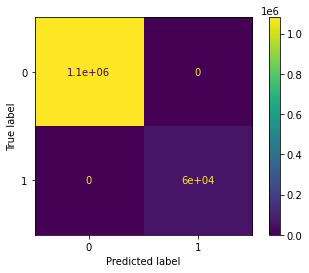

In [56]:
cm = confusion_matrix(y, y_pred)
cm_plot = ConfusionMatrixDisplay(cm).plot()

In [57]:
a,b,c,d = cm.ravel()
(a,b,c,d)

(1080399, 0, 0, 60205)

In [58]:
percentage_A = a / (a + b) #True positives = True positives / (True positives + false positives)
percentage_D = d / (d + c) #True positives = True negatives / (True negatives + false negatives)
print("Precission in true positives (A):",percentage_A," Precission in true negatives (D):",percentage_D)

Precission in true positives (A): 1.0  Precission in true negatives (D): 1.0


In [59]:
def getChurnProbabilities(clf, x):
    return clf.predict_proba(x)

In [60]:
proba_matrix = getChurnProbabilities(logistic_regression, x)

In [61]:
#function to set each client according to low, mid or high churn chance (given low and high percentages by the user)
def showProbabilities(low,mid,high):
    clients_permanent = []
    clients_low = []
    clients_mid = []
    clients_high = []
    i = 0
    #for each client in the data set
    for client in proba_matrix:
        #get all their data and their churn chance into one list
        client_index = x.index[i]
        client_info = x.loc[client_index].values
        client_info = np.append(client_info,client[1])
        #store client data into profiles(permanent, low, mid, high) list
        if client[1] < low:
            clients_permanent.append(client_info)
        elif client[1] < mid:
            clients_low.append(client_info)
        elif client[1] < high:
            clients_mid.append(client_info)
        else:
            clients_high.append(client_info)
        i += 1
    return clients_permanent, clients_low, clients_mid, clients_high

In [62]:
clients_permanent, clients_low, clients_mid, clients_high = showProbabilities(.30,.60,.80)

print(len(clients_permanent), " clients have no churn chances")
print(len(clients_low), " clients have low churn chances")
print(len(clients_mid), " clients have mid churn chances")
print(len(clients_high), " clients have high churn chances")

1080399  clients have no churn chances
0  clients have low churn chances
0  clients have mid churn chances
60205  clients have high churn chances
